# AI GO competition
## 2023/9/22

## PART 1. Data process

### Prepare the environment and import all library we need

In [35]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import requests
import opencc
from scipy import stats
import os
from matplotlib.font_manager import FontManager
from pyplotz.pyplotz import PyplotZ
from sklearn.preprocessing import LabelEncoder
opencc = opencc.OpenCC('t2s')
sns.set_theme(color_codes=True)
font_manager = FontManager()
font = font_manager.findfont('DejaVu Sans')

### function area


In [36]:
def count_unique_values_for_object_columns(df):
  """Counts the number of unique values in all object columns in a Pandas DataFrame.
  Args:
    df: A Pandas DataFrame.
  Returns:
    A dictionary mapping column names to the number of unique values in each column.
  """
  unique_values_counts = {}
  for column in df.select_dtypes(include=['object']):
    unique_values_counts[column] = df[column].nunique()
  return unique_values_counts

def convert_traditional_chinese_df_to_simplified_chinese_df(df):
  """Converts a traditional Chinese Pandas DataFrame to a simplified Chinese Pandas DataFrame in object dtype.
  Args:
    df: A Pandas DataFrame containing traditional Chinese text.
  Returns:
    A Pandas DataFrame containing simplified Chinese text and object dtype.
  """
  # Create a new Pandas DataFrame to store the simplified Chinese data.
  df_simplified = pd.DataFrame()
  # Iterate over the rows of the original DataFrame and convert the traditional Chinese text to simplified Chinese text using the `opencc` library.
  for index, row in df.iterrows():
    for column_name in df.columns:
      if pd.api.types.is_object_dtype(row[column_name]):
        simplified_text = opencc.convert(row[column_name])
        df_simplified.loc[index, column_name] = simplified_text
      else:
        df_simplified.loc[index, column_name] = row[column_name]
  # Change the dtype of all columns in the simplified Chinese DataFrame to object.
  df_simplified = df_simplified.astype('object')
  # Return the simplified Chinese DataFrame.
  return df_simplified


def plot_bar_chart_for_specific_column(df, column_name):
  pltz = PyplotZ()
  pltz.enable_chinese()
  value_counts = df[column_name].value_counts()
  value_counts.plot(kind='bar', color='skyblue')
  pltz.title(f'Count of Values in Column: {column_name}', fontsize=15)
  pltz.xlabel('Values', fontsize=12)
  pltz.ylabel('Count', fontsize=12)
  pltz.xticks(fontproperties=font)
  pltz.yticks(fontproperties=font)
  pltz.show()


### data loading

In [37]:
# Read the CSV file into a Pandas DataFrame
public_dataset_df = pd.read_csv('data/public_dataset.csv',encoding='utf-8-sig')
private_dataset_df = pd.read_csv('data/private_dataset.csv',encoding='utf-8-sig')
public_submission_template_df = pd.read_csv('data/submission/public_submission_template.csv',encoding='utf-8-sig')
training_data_df = pd.read_csv('data/training_data.csv',encoding='utf-8-sig')
postcode_data_df = pd.read_csv('data/external_data/postcode.csv',encoding='utf-8-sig')

### observing data

In [38]:
# training_data_df
print("training_data_df_df:")
#print(training_data_df.info())
print("================================")
print(count_unique_values_for_object_columns(training_data_df))
#print("================================")
#print(training_data_df.head(3)) 
#print("================================")
print(training_data_df.isnull().sum())
print("================================")
#plot_bar_chart_for_specific_column(training_data_df, '縣市')
#print("================================")
#simplified_chinese_training_data_df = convert_traditional_chinese_df_to_simplified_chinese_df(training_data_df)
#print(simplified_chinese_training_data_df.head(5))

training_data_df_df:
{'ID': 11751, '縣市': 18, '鄉鎮市區': 123, '路名': 3059, '使用分區': 5, '主要用途': 12, '主要建材': 6, '建物型態': 4, '備註': 87}
ID            0
縣市            0
鄉鎮市區          0
路名            0
土地面積          0
使用分區      11156
移轉層次          0
總樓層數          0
主要用途          0
主要建材          0
建物型態          0
屋齡            0
建物面積          0
車位面積          0
車位個數          0
橫坐標           0
縱坐標           0
備註        11659
主建物面積         0
陽台面積          0
附屬建物面積        0
單價            0
dtype: int64


public_dataset_df:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5876 entries, 0 to 5875
Data columns (total 21 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ID      5876 non-null   object 
 1   縣市      5876 non-null   object 
 2   鄉鎮市區    5876 non-null   object 
 3   路名      5876 non-null   object 
 4   土地面積    5876 non-null   float64
 5   使用分區    290 non-null    object 
 6   移轉層次    5876 non-null   int64  
 7   總樓層數    5876 non-null   int64  
 8   主要用途    5876 non-null   object 
 9   主要建材    5876 non-null   object 
 10  建物型態    5876 non-null   object 
 11  屋齡      5876 non-null   float64
 12  建物面積    5876 non-null   float64
 13  車位面積    5876 non-null   float64
 14  車位個數    5876 non-null   float64
 15  橫坐標     5876 non-null   int64  
 16  縱坐標     5876 non-null   int64  
 17  備註      48 non-null     object 
 18  主建物面積   5876 non-null   float64
 19  陽台面積    5876 non-null   float64
 20  附屬建物面積  5876 non-null   float64
dtypes: float64(8), int

c:\Users\Pesudocode\anaconda3\envs\AI-GO\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 22290 (\N{CJK UNIFIED IDEOGRAPH-5712}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\Pesudocode\anaconda3\envs\AI-GO\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 32291 (\N{CJK UNIFIED IDEOGRAPH-7E23}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\Pesudocode\anaconda3\envs\AI-GO\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 34349 (\N{CJK UNIFIED IDEOGRAPH-862D}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\Pesudocode\anaconda3\envs\AI-GO\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 38272 (\N{CJK UNIFIED IDEOGRAPH-9580}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\Pesudocode\anaconda3\envs\AI-GO\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 32681 (\N{CJK UNIF

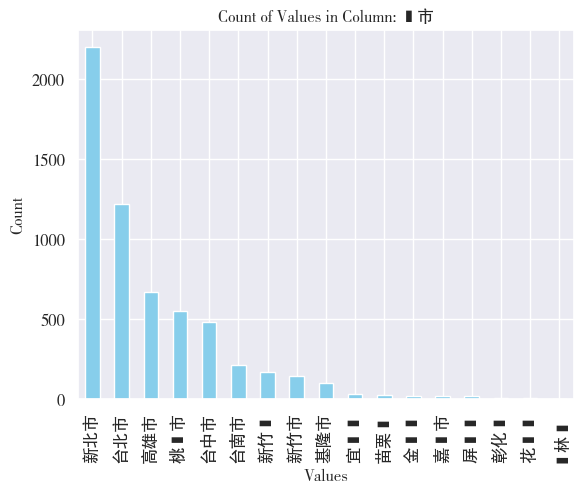

In [39]:
# public_dataset_df
print("public_dataset_df:")
print(public_dataset_df.info()) 
print("================================")
print(count_unique_values_for_object_columns(public_dataset_df))
print("================================")
print(public_dataset_df.head(3)) 
print("================================")
print(public_dataset_df.isnull().sum())
print("================================")
plot_bar_chart_for_specific_column(public_dataset_df, '縣市')

In [40]:
# public_submission_template_df
print(public_submission_template_df.info()) 
print("================================")
print(public_submission_template_df.head(3)) 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5876 entries, 0 to 5875
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               5876 non-null   object 
 1   predicted_price  5876 non-null   float64
dtypes: float64(1), object(1)
memory usage: 91.9+ KB
None
     ID  predicted_price
0  PU-1              0.0
1  PU-2              0.0
2  PU-3              0.0


### data process

In [41]:
# function area
def add_postcode_data(data_df, postcode_df):
    for i in range(len(data_df)):
        city = data_df.loc[i, "縣市"]
        district = data_df.loc[i, "鄉鎮市區"]
        matching_postcode_df = postcode_df[(postcode_df["縣市"] == city) & (postcode_df["鄉鎮市區"] == district)]
        postcode = int(matching_postcode_df["郵遞區號"])
        data_df.loc[i, "郵遞區號"] = postcode
    return data_df

In [42]:
# training data process
print(count_unique_values_for_object_columns(training_data_df))
training_data_df.insert(4, '郵遞區號', None)
add_postcode_data(training_data_df, postcode_data_df)
print(training_data_df.head(5)) 
labelencoder = LabelEncoder()
training_data_df["使用分區"] = labelencoder.fit_transform(training_data_df["使用分區"])
training_data_df["主要用途"] = labelencoder.fit_transform(training_data_df["主要用途"])
training_data_df["主要建材"] = labelencoder.fit_transform(training_data_df["主要建材"])
training_data_df["建物型態"] = labelencoder.fit_transform(training_data_df["建物型態"])
training_data_df = training_data_df.drop(['ID'],axis=1)
training_data_df = training_data_df.drop(['鄉鎮市區'], axis=1)
training_data_df = training_data_df.drop(['路名'], axis=1)
training_data_df = training_data_df.drop(['縣市'], axis=1)
training_data_df = training_data_df.drop(['備註'], axis=1)
print(training_data_df.describe())
#print("================================")
#print(training_data_df.info())
#print("================================")
#print(count_unique_values_for_object_columns(training_data_df))
#print("================================")
#print(training_data_df.isnull().sum())
print("Number of Samples Before removing outliers:")
training_data_df = training_data_df[(np.abs(stats.zscore(training_data_df['單價'])) < 4)]
print("Number of Samples After removing outliers:")
print(training_data_df.head(5)) 
if os.path.exists("./data/process_training_data.csv"):
  print("process_training_data exists.")
else:
  training_data_df.to_csv("./data/process_training_data.csv")
# change first column of new_training_data.csv to N

{'ID': 11751, '縣市': 18, '鄉鎮市區': 123, '路名': 3059, '使用分區': 5, '主要用途': 12, '主要建材': 6, '建物型態': 4, '備註': 87}


C:\Users\Pesudocode\AppData\Local\Temp\ipykernel_23264\3932344480.py:7: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  postcode = int(matching_postcode_df["郵遞區號"])


     ID   縣市 鄉鎮市區      路名 郵遞區號      土地面積 使用分區  移轉層次  總樓層數  主要用途  ...  \
0  TR-1  台北市  大安區  敦化南路二段  106 -0.256716  NaN    11    11   住家用  ...   
1  TR-2  台北市  萬華區     水源路  108  0.100134  NaN     7    12   住家用  ...   
2  TR-3  高雄市  鳳山區     北忠街  830  0.181921  NaN    10    15  集合住宅  ...   
3  TR-4  新北市  新莊區     福前街  242  0.085594  NaN     9    14  集合住宅  ...   
4  TR-5  新北市  板橋區   文化路一段  220 -0.938116  NaN    41    43   住家用  ...   

       建物面積      車位面積  車位個數     橫坐標      縱坐標   備註     主建物面積      陽台面積  \
0 -0.174154 -0.819326   0.0  305266  2768378  NaN  0.393926  0.183700   
1  0.314204 -0.819326   0.0  300677  2767990  NaN -0.316131  0.608577   
2  0.423366  0.161624   1.0  184815  2504666  NaN -0.098871 -0.360620   
3  0.164249  0.524653   1.0  296653  2772355  NaN -0.071147  0.315088   
4  0.985839  0.532377   1.0  297377  2768472  NaN  0.791954  1.719400   

     附屬建物面積        單價  
0 -0.438452  4.627714  
1 -0.438452  1.887258  
2  1.525881  1.489072  
3  0.231984  2.051217  
4 -0.438

In [43]:
# public dataset process
print(count_unique_values_for_object_columns(public_dataset_df))
public_dataset_df.insert(4, '郵遞區號', None)
add_postcode_data(public_dataset_df, postcode_data_df)
print(public_dataset_df.head(5)) 
labelencoder = LabelEncoder()
public_dataset_df["使用分區"] = labelencoder.fit_transform(public_dataset_df["使用分區"])
public_dataset_df["主要用途"] = labelencoder.fit_transform(public_dataset_df["主要用途"])
public_dataset_df["主要建材"] = labelencoder.fit_transform(public_dataset_df["主要建材"])
public_dataset_df["建物型態"] = labelencoder.fit_transform(public_dataset_df["建物型態"])
public_dataset_df = public_dataset_df.drop(['ID'],axis=1)
public_dataset_df = public_dataset_df.drop(['鄉鎮市區'], axis=1)
public_dataset_df = public_dataset_df.drop(['路名'], axis=1)
public_dataset_df = public_dataset_df.drop(['縣市'], axis=1)
public_dataset_df = public_dataset_df.drop(['備註'], axis=1)
print(public_dataset_df.describe())
print(public_dataset_df.head(5)) 
if os.path.exists("./data/process_public_dataset.csv"):
  print("process_public_dataset exists.")
else:
  public_dataset_df.to_csv("./data/process_public_dataset.csv")

{'ID': 5876, '縣市': 17, '鄉鎮市區': 117, '路名': 2266, '使用分區': 5, '主要用途': 11, '主要建材': 6, '建物型態': 4, '備註': 48}


C:\Users\Pesudocode\AppData\Local\Temp\ipykernel_23264\3932344480.py:7: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  postcode = int(matching_postcode_df["郵遞區號"])


     ID   縣市 鄉鎮市區      路名 郵遞區號      土地面積 使用分區  移轉層次  總樓層數  主要用途  ...  \
0  PU-1  新北市  樹林區     大有路  238  2.039378  NaN     3     7   住家用  ...   
1  PU-2  新北市  三重區   力行路一段  241 -0.077786  NaN     5     5   住家用  ...   
2  PU-3  新北市  板橋區   民生路三段  220 -0.555766  NaN     2    20  集合住宅  ...   
3  PU-4  新北市  泰山區   明志路二段  243 -0.744838  NaN     6    16   住家用  ...   
4  PU-5  台北市  信義區  忠孝東路五段  110 -0.610923  NaN     3     7   住家用  ...   

          屋齡      建物面積      車位面積  車位個數     橫坐標      縱坐標   備註     主建物面積  \
0  13.916667  0.472202  0.146176   1.0  288745  2760266  NaN  0.849664   
1  40.833333 -0.546455 -0.819326   0.0  298751  2773492  NaN -0.004102   
2   1.333333  0.124032 -0.167419   1.0  297000  2769106  NaN -0.285862   
3  27.500000 -0.027072  0.115280   1.0  293076  2771160  NaN  0.027582   
4  40.500000 -0.863600 -0.819326   0.0  308103  2770220  NaN -0.883328   

       陽台面積    附屬建物面積  
0  0.146161 -0.438452  
1  0.064257 -0.438452  
2 -0.775260  1.323042  
3  0.316794 -0.139532  
4 

In [44]:
# private dataset process
print(count_unique_values_for_object_columns(private_dataset_df))
private_dataset_df.insert(4, '郵遞區號', None)
add_postcode_data(private_dataset_df, postcode_data_df)
print(private_dataset_df.head(5)) 
labelencoder = LabelEncoder()
private_dataset_df["使用分區"] = labelencoder.fit_transform(private_dataset_df["使用分區"])
private_dataset_df["主要用途"] = labelencoder.fit_transform(private_dataset_df["主要用途"])
private_dataset_df["主要建材"] = labelencoder.fit_transform(private_dataset_df["主要建材"])
private_dataset_df["建物型態"] = labelencoder.fit_transform(private_dataset_df["建物型態"])
private_dataset_df = private_dataset_df.drop(['ID'],axis=1)
private_dataset_df = private_dataset_df.drop(['鄉鎮市區'], axis=1)
private_dataset_df = private_dataset_df.drop(['路名'], axis=1)
private_dataset_df = private_dataset_df.drop(['縣市'], axis=1)
private_dataset_df = private_dataset_df.drop(['備註'], axis=1)
print(private_dataset_df.describe())
print(private_dataset_df.head(5)) 
if os.path.exists("./data/process_private_dataset.csv"):
  print("process_private_dataset exists.")
else:
  private_dataset_df.to_csv("./data/process_private_dataset.csv")

{'ID': 5875, '縣市': 16, '鄉鎮市區': 111, '路名': 2248, '使用分區': 5, '主要用途': 11, '主要建材': 6, '建物型態': 4, '備註': 41}


C:\Users\Pesudocode\AppData\Local\Temp\ipykernel_23264\3932344480.py:7: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  postcode = int(matching_postcode_df["郵遞區號"])


     ID   縣市 鄉鎮市區   路名 郵遞區號      土地面積 使用分區  移轉層次  總樓層數 主要用途  ...         屋齡  \
0  PR-1  高雄市  前鎮區  鎮海路  806 -0.541033  NaN    12    14  住家用  ...  27.916667   
1  PR-2  台北市  北投區  大同街  112  0.753799  NaN     4     7   其他  ...   0.750000   
2  PR-3  台北市  大同區  大龍街  103  0.482869    住     6     7  住家用  ...  43.916667   
3  PR-4  新北市  蘆洲區  民族路  247  0.390940  NaN     4     4  住家用  ...  45.416667   
4  PR-5  新北市  新莊區  龍安路  242 -0.711599  NaN     3     8  住家用  ...  27.250000   

       建物面積      車位面積  車位個數     橫坐標      縱坐標   備註     主建物面積      陽台面積  \
0  0.043596 -0.819326   0.0  179750  2499123  NaN  0.127159  0.035249   
1 -0.200582  0.311470   1.0  300436  2781335  NaN -0.464083 -0.160979   
2  0.211936 -0.819326   0.0  302091  2773374  NaN  0.832407  2.461656   
3 -0.685493 -0.819326   0.0  298394  2775413  NaN  0.052476 -1.642077   
4 -0.898072 -0.819326   0.0  292572  2767887  NaN -0.968196 -0.333319   

     附屬建物面積  
0 -0.438452  
1 -0.438452  
2 -0.438452  
3 -0.438452  
4 -0.022099  

[

## PART 2. Model

### Prepare the environment and import all library we need

In [45]:
import torch
from scipy import stats
from sklearn.model_selection import train_test_split
import xgboost as xgb
from sklearn.metrics import r2_score
import os
from datetime import datetime
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import joblib # save model
print(
    # 確認 torch 的版本
    f'PyTorch version {torch.__version__}\n' +
    # 確認是否有 GPU 裝置
    f'GPU-enabled installation? {torch.cuda.is_available()}\n'
    # 確認GPU 0裝置名字
    f'GPU-device name? {torch.cuda.get_device_name(0)}\n'
    # 確認GPU 1裝置名字
    f'GPU-device name? {torch.cuda.get_device_name(1)}\n'
)
os.environ["CUDA_VISIBLE_DEVICES"] = "1,0" # 更改預設gpu為1
pd.options.mode.chained_assignment = None # 關閉copywarning

PyTorch version 2.1.0
GPU-enabled installation? True
GPU-device name? NVIDIA GeForce RTX 4070 Ti
GPU-device name? NVIDIA GeForce RTX 3090



### data loading

In [46]:
public_dataset_df = pd.read_csv('data/process_public_dataset.csv',encoding='utf-8-sig')
private_dataset_df = pd.read_csv('data/process_private_dataset.csv',encoding='utf-8-sig')
public_submission_template_df = pd.read_csv('data/submission/public_submission_template.csv',encoding='utf-8-sig')
training_data_df = pd.read_csv('data/process_training_data.csv',encoding='utf-8-sig')

### Gradient Boosting Model

In [47]:
# function area
def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100
    
def rmse(y, y_pred):
    return np.exp(np.sqrt(np.mean((y - y_pred) ** 2)))

In [48]:
X = training_data_df.drop('單價', axis=1)
y = training_data_df['單價']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = xgb.XGBRegressor(n_estimators = 100, max_depth=8, learning_rate=0.1, subsample=0.5)
xgb_model = model.fit(X_train, y_train)

c:\Users\Pesudocode\anaconda3\envs\AI-GO\lib\site-packages\xgboost\data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
c:\Users\Pesudocode\anaconda3\envs\AI-GO\lib\site-packages\xgboost\data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
c:\Users\Pesudocode\anaconda3\envs\AI-GO\lib\site-packages\xgboost\data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype):
c:\Users\Pesudocode\anaconda3\envs\AI-GO\lib\site-packages\xgboost\data.py:359: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  retur

In [49]:
xgb_pred = xgb_model.predict(X_test)

c:\Users\Pesudocode\anaconda3\envs\AI-GO\lib\site-packages\xgboost\data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
c:\Users\Pesudocode\anaconda3\envs\AI-GO\lib\site-packages\xgboost\data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
c:\Users\Pesudocode\anaconda3\envs\AI-GO\lib\site-packages\xgboost\data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype):
c:\Users\Pesudocode\anaconda3\envs\AI-GO\lib\site-packages\xgboost\data.py:359: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  retur

rmse: 1.288518561011111
mape: 10.21095276229826
R2 Score: 0.9167382914809563


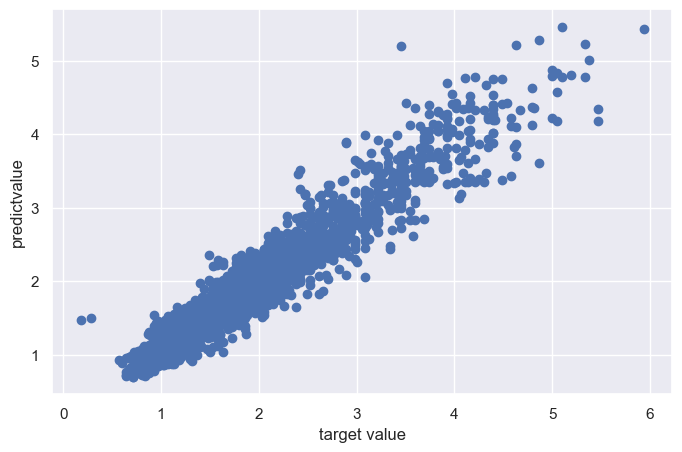

In [50]:
xgb_rmse = rmse(y_test, xgb_pred)
xgb_mape = mean_absolute_percentage_error(y_test, xgb_pred)
xgb_r2 = r2_score(y_test, xgb_pred)
print("rmse:", xgb_rmse)
print("mape:", xgb_mape)
print("R2 Score:", xgb_r2)
plt.figure(figsize=(8,5))
plt.scatter(y_test,xgb_pred)
plt.xlabel("target value") #x label
plt.ylabel("predictvalue") #y label
plt.show()

In [51]:
# save model and test public data
current_date = datetime.today().strftime('%m-%d')
model_name = 'xgb_model_mape' + str(int(xgb_mape)) + '_date' + str(current_date)
filename = './data/model/' + model_name
joblib.dump(model, filename)
loaded_model = joblib.load(filename)
public_dataset_pred = loaded_model.predict(public_dataset_df)
original_public_dataset_df = pd.read_csv('data/public_dataset.csv',encoding='utf-8-sig')
publict_submission_df = pd.DataFrame({'ID': original_public_dataset_df['ID'], '單價': public_dataset_pred})
submissionname = './data/submission/publict_submission_' + model_name + '.csv'
publict_submission_df.to_csv(submissionname, index=False)

c:\Users\Pesudocode\anaconda3\envs\AI-GO\lib\site-packages\xgboost\data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
c:\Users\Pesudocode\anaconda3\envs\AI-GO\lib\site-packages\xgboost\data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
c:\Users\Pesudocode\anaconda3\envs\AI-GO\lib\site-packages\xgboost\data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype):
c:\Users\Pesudocode\anaconda3\envs\AI-GO\lib\site-packages\xgboost\data.py:359: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  retur

In [52]:
# test private data and generate private submission
private_dataset_pred = loaded_model.predict(private_dataset_df)
original_private_dataset_df = pd.read_csv('data/private_dataset.csv',encoding='utf-8-sig')
private_submission_df = pd.DataFrame({'ID': original_private_dataset_df['ID'], '單價': private_dataset_pred})
submissionname = './data/submission/private_submission_' + model_name + '.csv'
private_submission_df.to_csv(submissionname, index=False)

c:\Users\Pesudocode\anaconda3\envs\AI-GO\lib\site-packages\xgboost\data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
c:\Users\Pesudocode\anaconda3\envs\AI-GO\lib\site-packages\xgboost\data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
c:\Users\Pesudocode\anaconda3\envs\AI-GO\lib\site-packages\xgboost\data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype):
c:\Users\Pesudocode\anaconda3\envs\AI-GO\lib\site-packages\xgboost\data.py:359: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  retur

In [53]:
#model_name = 'xgb_model_mape10_date11-10'
#filename = './data/model/' + model_name
#joblib.dump(model, filename)
#loaded_model = joblib.load(filename)
#training_data_pred = loaded_model.predict(training_data_df)
#original_training_data_df = pd.read_csv('data/training_data.csv',encoding='utf-8-sig')
#new_training_data_df = pd.DataFrame({'ID': original_training_data_df['ID'], '預測單價': training_data_pred})
#submission_name = './data/new_training_data_df.csv'
#new_training_data_df.to_csv(submissionname, index=False)